In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test  = x_test.reshape(-1, 784).astype("float32") / 255.0

print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [ ]:
latent_dim = 32
sgd = SGD(learning_rate=0.05, momentum=0.9)

encoder = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(latent_dim, activation='relu')
])

decoder = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(latent_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(784, activation='sigmoid')
])

autoencoder = models.Sequential([encoder, decoder])

c:\Users\Omar Emad\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
autoencoder.compile(
    optimizer= sgd,
    loss='mse'
)

history = autoencoder.fit(
    x_train, x_train,
    epochs=40,
    batch_size=256,
    validation_data=(x_test, x_test),
    verbose=1
)

Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.1536 - val_loss: 0.0700
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0677 - val_loss: 0.0663
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0651 - val_loss: 0.0646
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0641 - val_loss: 0.0639
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0636 - val_loss: 0.0636
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0633 - val_loss: 0.0634
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0631 - val_loss: 0.0632
Epoch 8/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0628 - val_loss: 0.0629
Epoch 9/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0625 - val_loss: 0.0624
Epoch 10/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0617 - val_loss: 0.0611
Epoch 11/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0601 - val_loss: 0.0589
Epoch 12/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 

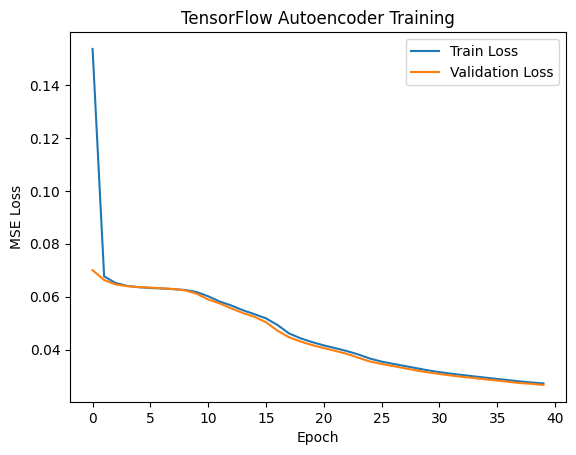

In [5]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('TensorFlow Autoencoder Training')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


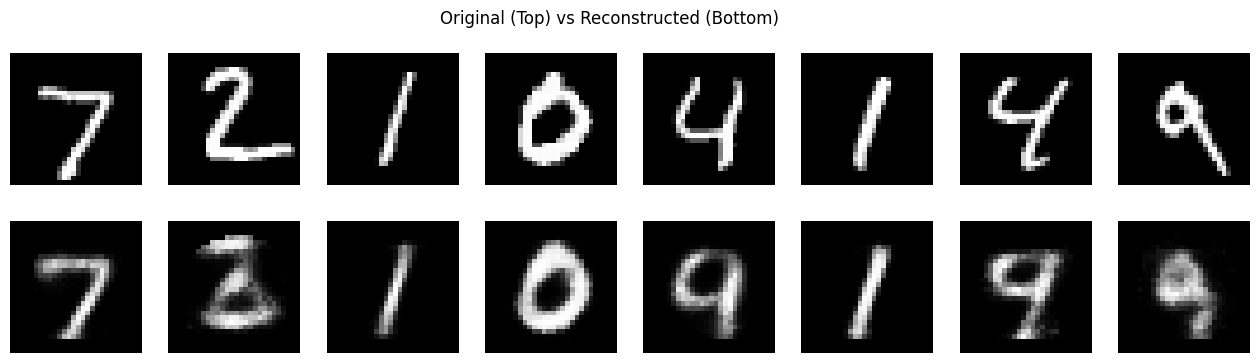

In [6]:
n = 8
decoded_imgs = autoencoder.predict(x_test[:n])

plt.figure(figsize=(16,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.axis('off')

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28), cmap='gray')
    plt.axis('off')

plt.suptitle("Original (Top) vs Reconstructed (Bottom)")
plt.show()

In [7]:
Z_train = encoder.predict(x_train)
Z_test  = encoder.predict(x_test)

print(Z_train.shape, Z_test.shape)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(60000, 32) (10000, 32)


In [8]:
svm = SVC(kernel='rbf', C=10, gamma='scale')
svm.fit(Z_train, y_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [9]:
y_pred = svm.predict(Z_test)

print("TF Encoder + SVM Accuracy:",
      accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

TF Encoder + SVM Accuracy: 0.9255
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.98      0.99      0.98      1135
           2       0.92      0.94      0.93      1032
           3       0.90      0.90      0.90      1010
           4       0.90      0.91      0.91       982
           5       0.90      0.91      0.90       892
           6       0.96      0.94      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.90      0.89      0.89       974
           9       0.88      0.87      0.87      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



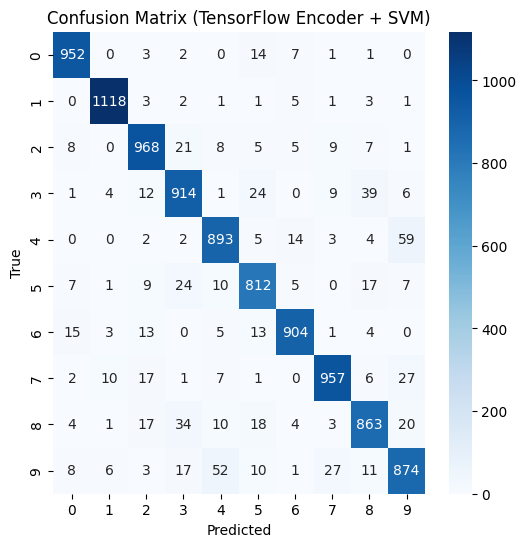

In [10]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (TensorFlow Encoder + SVM)")
plt.show()